In [13]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print('Train: X = %s, y = %s' % (x_train.shape, y_train.shape))
print('Test: X = %s, y = %s' % (x_test.shape, y_test.shape))

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


In [14]:
import numpy as np

# Add an empty color dimension to the dataset
trainX = np.expand_dims(x_train, -1)
testX = np.expand_dims(x_test, -1)
 
print(x_train.shape)

(60000, 28, 28)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model = Sequential()

model.add(Conv2D(64, (3, 3),
                  padding="same",
                  activation="relu",
                  input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               3211520   
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 3,214,730
Trainable params: 3,214,730
Non-trainable params: 0
____________________________________________

In [16]:
import tensorflow as tf

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

In [18]:
history = model.fit(
    x_train.astype(np.float32), y_train.astype(np.float32),
    epochs = 20,
    batch_size = 256,
    validation_split = 0.33
)

Epoch 1/20
158/158 [==============================] - 51s 315ms/step - loss: 11.9233 - sparse_categorical_accuracy: 0.7738 - val_loss: 0.4550 - val_sparse_categorical_accuracy: 0.8559
Epoch 2/20
158/158 [==============================] - 50s 319ms/step - loss: 0.3718 - sparse_categorical_accuracy: 0.8804 - val_loss: 0.3561 - val_sparse_categorical_accuracy: 0.8844
Epoch 3/20
158/158 [==============================] - 50s 315ms/step - loss: 0.2745 - sparse_categorical_accuracy: 0.9054 - val_loss: 0.3724 - val_sparse_categorical_accuracy: 0.8789
Epoch 4/20
158/158 [==============================] - 51s 320ms/step - loss: 0.2430 - sparse_categorical_accuracy: 0.9155 - val_loss: 0.3392 - val_sparse_categorical_accuracy: 0.8876
Epoch 5/20
158/158 [==============================] - 50s 318ms/step - loss: 0.2151 - sparse_categorical_accuracy: 0.9207 - val_loss: 0.3999 - val_sparse_categorical_accuracy: 0.8735
Epoch 6/20
158/158 [==============================] - 49s 311ms/step - loss: 0.1898 

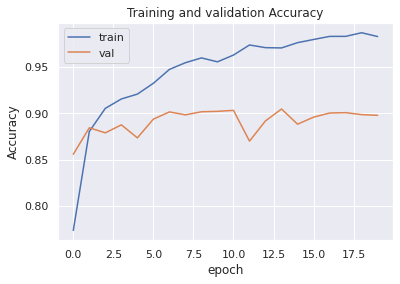

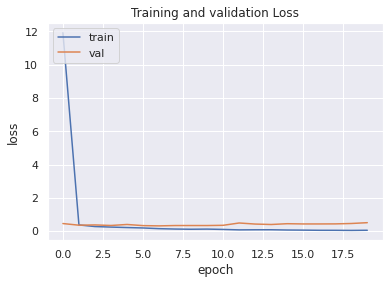

In [24]:
import matplotlib.pyplot as plt

# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Training and validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
loss,accuracy = model.evaluate(x_test, y_test)
print("MLP score: ", np.round(accuracy * 100, 2), "%")

313/313 [==============================] - 5s 17ms/step - loss: 0.5552 - sparse_categorical_accuracy: 0.8892
MLP score:  88.92 %


313/313 [==============================] - 5s 16ms/step


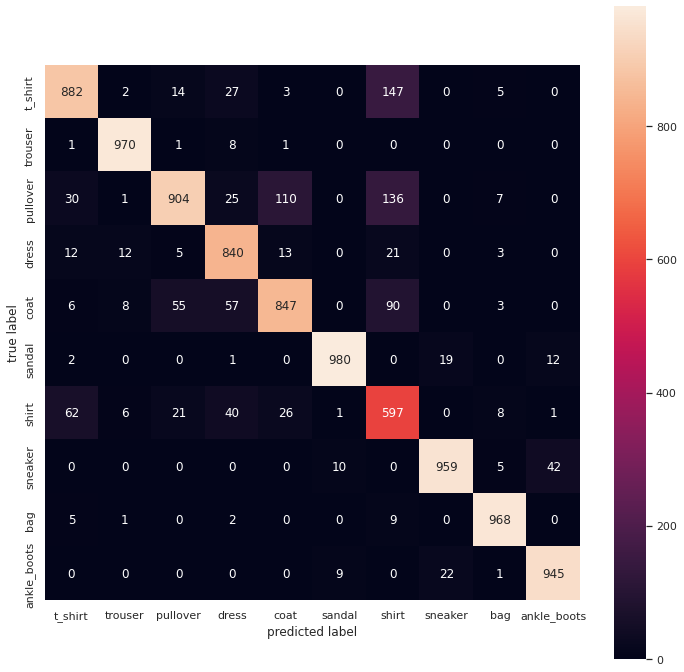

In [22]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)

labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

# use seaborn plotting defaults
import seaborn as sns; sns.set()

y_pred = np.argmax(y_pred,axis=1)

plt.figure(figsize=(12, 12))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, xticklabels=labels,yticklabels=labels)
plt.xlabel('predicted label')
plt.ylabel('true label');

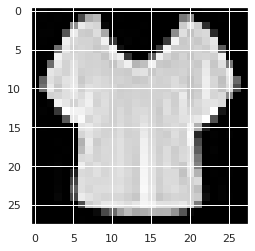

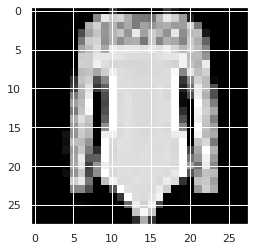

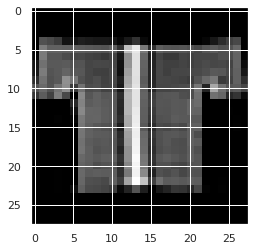

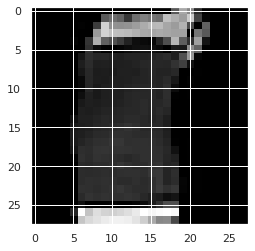

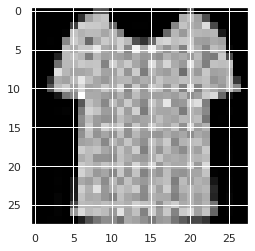

In [23]:
count = 0

for i in range(0, np.size(y_test)):
  if((y_test[i] == np.uint8(0)) and (y_pred[i] == np.uint8(6))):
    if(count < 5):
      plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))
      # plt.title('True: ', y_test[i])
      plt.show()
    count = count + 1

# print(count)